In [3]:
import struct
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [5]:
MAPcmap = [
    [2.65625, 0.0, 0.0],
    [5.3125, 0.0, 0.0],
    [7.96875, 0.0, 0.0],
    [10.625, 0.0, 0.0],
    [13.28125, 0.0, 0.0],
    [15.9375, 0.0, 0.0],
    [18.59375, 0.0, 0.0],
    [21.25, 0.0, 0.0],
    [23.90625, 0.0, 0.0],
    [26.5625, 0.0, 0.0],
    [29.21875, 0.0, 0.0],
    [31.875, 0.0, 0.0],
    [34.53125, 0.0, 0.0],
    [37.1875, 0.0, 0.0],
    [39.84375, 0.0, 0.0],
    [42.5, 0.0, 0.0],
    [45.15625, 0.0, 0.0],
    [47.8125, 0.0, 0.0],
    [50.46875, 0.0, 0.0],
    [53.125, 0.0, 0.0],
    [55.78125, 0.0, 0.0],
    [58.4375, 0.0, 0.0],
    [61.09375, 0.0, 0.0],
    [63.75, 0.0, 0.0],
    [66.40625, 0.0, 0.0],
    [69.0625, 0.0, 0.0],
    [71.71875, 0.0, 0.0],
    [74.375, 0.0, 0.0],
    [77.03125, 0.0, 0.0],
    [79.6875, 0.0, 0.0],
    [82.34375, 0.0, 0.0],
    [85.0, 0.0, 0.0],
    [87.65625, 0.0, 0.0],
    [90.3125, 0.0, 0.0],
    [92.96875, 0.0, 0.0],
    [95.625, 0.0, 0.0],
    [98.28125, 0.0, 0.0],
    [100.9375, 0.0, 0.0],
    [103.59375, 0.0, 0.0],
    [106.25, 0.0, 0.0],
    [108.90625, 0.0, 0.0],
    [111.5625, 0.0, 0.0],
    [114.21875, 0.0, 0.0],
    [116.875, 0.0, 0.0],
    [119.53125, 0.0, 0.0],
    [122.1875, 0.0, 0.0],
    [124.84375, 0.0, 0.0],
    [127.5, 0.0, 0.0],
    [130.15625, 0.0, 0.0],
    [132.8125, 0.0, 0.0],
    [135.46875, 0.0, 0.0],
    [138.125, 0.0, 0.0],
    [140.78125, 0.0, 0.0],
    [143.4375, 0.0, 0.0],
    [146.09375, 0.0, 0.0],
    [148.75, 0.0, 0.0],
    [151.40625, 0.0, 0.0],
    [154.0625, 0.0, 0.0],
    [156.71875, 0.0, 0.0],
    [159.375, 0.0, 0.0],
    [162.03125, 0.0, 0.0],
    [164.6875, 0.0, 0.0],
    [167.34375, 0.0, 0.0],
    [170.0, 0.0, 0.0],
    [172.65625, 0.0, 0.0],
    [175.3125, 0.0, 0.0],
    [177.96875, 0.0, 0.0],
    [180.625, 0.0, 0.0],
    [183.28125, 0.0, 0.0],
    [185.9375, 0.0, 0.0],
    [188.59375, 0.0, 0.0],
    [191.25, 0.0, 0.0],
    [193.90625, 0.0, 0.0],
    [196.5625, 0.0, 0.0],
    [199.21875, 0.0, 0.0],
    [201.875, 0.0, 0.0],
    [204.53125, 0.0, 0.0],
    [207.1875, 0.0, 0.0],
    [209.84375, 0.0, 0.0],
    [212.5, 0.0, 0.0],
    [215.15625, 0.0, 0.0],
    [217.8125, 0.0, 0.0],
    [220.46875, 0.0, 0.0],
    [223.125, 0.0, 0.0],
    [225.78125, 0.0, 0.0],
    [228.4375, 0.0, 0.0],
    [231.09375, 0.0, 0.0],
    [233.75, 0.0, 0.0],
    [236.40625, 0.0, 0.0],
    [239.0625, 0.0, 0.0],
    [241.71875, 0.0, 0.0],
    [244.375, 0.0, 0.0],
    [247.03125, 0.0, 0.0],
    [249.6875, 0.0, 0.0],
    [252.34375, 0.0, 0.0],
    [255.0, 0.0, 0.0],
    [255.0, 2.65625, 0.0],
    [255.0, 5.3125, 0.0],
    [255.0, 7.96875, 0.0],
    [255.0, 10.625, 0.0],
    [255.0, 13.28125, 0.0],
    [255.0, 15.9375, 0.0],
    [255.0, 18.59375, 0.0],
    [255.0, 21.25, 0.0],
    [255.0, 23.90625, 0.0],
    [255.0, 26.5625, 0.0],
    [255.0, 29.21875, 0.0],
    [255.0, 31.875, 0.0],
    [255.0, 34.53125, 0.0],
    [255.0, 37.1875, 0.0],
    [255.0, 39.84375, 0.0],
    [255.0, 42.5, 0.0],
    [255.0, 45.15625, 0.0],
    [255.0, 47.8125, 0.0],
    [255.0, 50.46875, 0.0],
    [255.0, 53.125, 0.0],
    [255.0, 55.78125, 0.0],
    [255.0, 58.4375, 0.0],
    [255.0, 61.09375, 0.0],
    [255.0, 63.75, 0.0],
    [255.0, 66.40625, 0.0],
    [255.0, 69.0625, 0.0],
    [255.0, 71.71875, 0.0],
    [255.0, 74.375, 0.0],
    [255.0, 77.03125, 0.0],
    [255.0, 79.6875, 0.0],
    [255.0, 82.34375, 0.0],
    [255.0, 85.0, 0.0],
    [255.0, 87.65625, 0.0],
    [255.0, 90.3125, 0.0],
    [255.0, 92.96875, 0.0],
    [255.0, 95.625, 0.0],
    [255.0, 98.28125, 0.0],
    [255.0, 100.9375, 0.0],
    [255.0, 103.59375, 0.0],
    [255.0, 106.25, 0.0],
    [255.0, 108.90625, 0.0],
    [255.0, 111.5625, 0.0],
    [255.0, 114.21875, 0.0],
    [255.0, 116.875, 0.0],
    [255.0, 119.53125, 0.0],
    [255.0, 122.1875, 0.0],
    [255.0, 124.84375, 0.0],
    [255.0, 127.5, 0.0],
    [255.0, 130.15625, 0.0],
    [255.0, 132.8125, 0.0],
    [255.0, 135.46875, 0.0],
    [255.0, 138.125, 0.0],
    [255.0, 140.78125, 0.0],
    [255.0, 143.4375, 0.0],
    [255.0, 146.09375, 0.0],
    [255.0, 148.75, 0.0],
    [255.0, 151.40625, 0.0],
    [255.0, 154.0625, 0.0],
    [255.0, 156.71875, 0.0],
    [255.0, 159.375, 0.0],
    [255.0, 162.03125, 0.0],
    [255.0, 164.6875, 0.0],
    [255.0, 167.34375, 0.0],
    [255.0, 170.0, 0.0],
    [255.0, 172.65625, 0.0],
    [255.0, 175.3125, 0.0],
    [255.0, 177.96875, 0.0],
    [255.0, 180.625, 0.0],
    [255.0, 183.28125, 0.0],
    [255.0, 185.9375, 0.0],
    [255.0, 188.59375, 0.0],
    [255.0, 191.25, 0.0],
    [255.0, 193.90625, 0.0],
    [255.0, 196.5625, 0.0],
    [255.0, 199.21875, 0.0],
    [255.0, 201.875, 0.0],
    [255.0, 204.53125, 0.0],
    [255.0, 207.1875, 0.0],
    [255.0, 209.84375, 0.0],
    [255.0, 212.5, 0.0],
    [255.0, 215.15625, 0.0],
    [255.0, 217.8125, 0.0],
    [255.0, 220.46875, 0.0],
[255.0, 223.125, 0.0],
[255.0, 225.78125, 0.0],
[255.0, 228.4375, 0.0],
[255.0, 231.09375, 0.0],
[255.0, 233.75, 0.0],
[255.0, 236.40625, 0.0],
[255.0, 239.0625, 0.0],
[255.0, 241.71875, 0.0],
[255.0, 244.375, 0.0],
[255.0, 247.03125, 0.0],
[255.0, 249.6875, 0.0],
[255.0, 252.34375, 0.0],
[255.0, 255.0, 0.0],
[255.0, 255.0, 3.984375],
[255.0, 255.0, 7.96875],
[255.0, 255.0, 11.953125],
[255.0, 255.0, 15.9375],
[255.0, 255.0, 19.921875],
[255.0, 255.0, 23.90625],
[255.0, 255.0, 27.890625],
[255.0, 255.0, 31.875],
[255.0, 255.0, 35.859375],
[255.0, 255.0, 39.84375],
[255.0, 255.0, 43.828125],
[255.0, 255.0, 47.8125],
[255.0, 255.0, 51.796875],
[255.0, 255.0, 55.78125],
[255.0, 255.0, 59.765625],
[255.0, 255.0, 63.75],
[255.0, 255.0, 67.734375],
[255.0, 255.0, 71.71875],
[255.0, 255.0, 75.703125],
[255.0, 255.0, 79.6875],
[255.0, 255.0, 83.671875],
[255.0, 255.0, 87.65625],
[255.0, 255.0, 91.640625],
[255.0, 255.0, 95.625],
[255.0, 255.0, 99.609375],
[255.0, 255.0, 103.59375],
[255.0, 255.0, 107.578125],
[255.0, 255.0, 111.5625],
[255.0, 255.0, 115.546875],
[255.0, 255.0, 119.53125],
[255.0, 255.0, 123.515625],
[255.0, 255.0, 127.5],
[255.0, 255.0, 131.484375],
[255.0, 255.0, 135.46875],
[255.0, 255.0, 139.453125],
[255.0, 255.0, 143.4375],
[255.0, 255.0, 147.421875],
[255.0, 255.0, 151.40625],
[255.0, 255.0, 155.390625],
[255.0, 255.0, 159.375],
[255.0, 255.0, 163.359375],
[255.0, 255.0, 167.34375],
[255.0, 255.0, 171.328125],
[255.0, 255.0, 175.3125],
[255.0, 255.0, 179.296875],
[255.0, 255.0, 183.28125],
[255.0, 255.0, 187.265625],
[255.0, 255.0, 191.25],
[255.0, 255.0, 195.234375],
[255.0, 255.0, 199.21875],
[255.0, 255.0, 203.203125],
[255.0, 255.0, 207.1875],
[255.0, 255.0, 211.171875],
[255.0, 255.0, 215.15625],
[255.0, 255.0, 219.140625],
[255.0, 255.0, 223.125],
[255.0, 255.0, 227.109375],
[255.0, 255.0, 231.09375],
[255.0, 255.0, 235.078125],
[255.0, 255.0, 239.0625],
[255.0, 255.0, 243.046875],
[255.0, 255.0, 247.03125],
[255.0, 255.0, 251.015625],
[255.0, 255.0, 255.0]
]

In [12]:
# 定义文件路径、数据尺寸和限制值
file_path = '02.bin'
width = 1000
height = 1000
segment_size = 1024
lim_max = 80.0  # 可根据实际情况调整
lim_min = -150.0      # 可根据实际情况调整

# 初始化point_mapvalue列表
point_mapvalue = []

# 打开二进制文件
with open(file_path, 'rb') as file:
    # 循环处理每个段
    # for _ in range(width * height):
    # 计算总的段数
    total_segments = width * height
    # 使用tqdm创建进度条
    for _ in tqdm(range(total_segments), desc="Processing segments", unit="segment"):
        # 读取1024个16位数据
        data = file.read(segment_size * 2)  # 每个16位数据占2字节
        # print(len(data))
        # print(data)
        # 将二进制数据按小端模式解包为整数
        values = struct.unpack('<' + 'h' * segment_size, data)
        values = [value * 1000.0 / 32768.0 for value in values]
        # 简单的数据探查：打印部分数据
        # if _ < 5:
        #     print(f"Segment {_}: {values[:10]}")
        # print(len(values))
        
        # 找到段内的最大值和最小值
        max_value = max(values)
        min_value = min(values)
        # if _ < 10:
        #     print(f"Segment {_}: {min_value}")
        
        # 根据lim_max和lim_min调整最大值和最小值
        if max_value > lim_max:
            max_value = lim_max
        if min_value < lim_min:
            min_value = lim_min
        
        # 计算delta和lim_delta
        delta = max_value - min_value
        lim_delta = lim_max - lim_min
        
        # 计算point_mapvalue
        point_value = int((delta / lim_delta) * 255.0)
        
        point_mapvalue.append(point_value)

# 现在point_mapvalue列表包含了1000 * 1000个point_value
print(len(point_mapvalue))  # 输出列表长度，应该是1000 * 1000

Processing segments: 100%|██████████| 1000000/1000000 [01:06<00:00, 15056.37segment/s]


1000000


图像已保存为 output_image.png


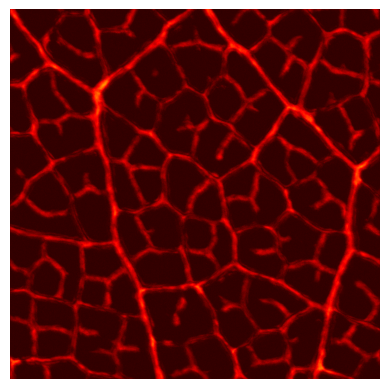

In [15]:
# 创建一个空的图像数组
image_array = np.zeros((height, width, 3), dtype=np.uint8)

# 按规则填充图像数组
for i in range(height):
    if i % 2 == 0:  # 偶数行（索引从 0 开始）从左到右排布
        start_index = i * width
        end_index = (i + 1) * width
        for j in range(width):
            index = point_mapvalue[start_index + j]
            image_array[i, j] = MAPcmap[index]
    else:  # 奇数行从右到左排布
        start_index = i * width
        end_index = (i + 1) * width
        for j in range(width):
            index = point_mapvalue[start_index + (width - 1 - j)]
            image_array[i, j] = MAPcmap[index]



# 使用 matplotlib 显示图像
plt.imshow(image_array)
plt.axis('off')  # 关闭坐标轴显示

# 保存图像
image_filename = 'output_image.png'
plt.savefig(image_filename, bbox_inches='tight', pad_inches=0)
print(f"图像已保存为 {image_filename}")

plt.show()